# Customer Churn Prediction

This notebook builds a customer churn prediction model using Logistic Regression and SHAP for model interpretability.

**Accuracy achieved:** ~88%

## Dataset
- Telco Customer Churn Dataset (IBM)
- Source: Kaggle
- Downloaded using kagglehub

## Techniques Used
- Data preprocessing
- Logistic Regression
- Model evaluation
- SHAP explainability


In [1]:
import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("palashfendarkar/wa-fnusec-telcocustomerchurn")

Using Colab cache for faster access to the 'wa-fnusec-telcocustomerchurn' dataset.


In [3]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/wa-fnusec-telcocustomerchurn


In [4]:
import pandas as pd

In [8]:
import os

# List the contents of the directory
print("Contents of the dataset directory:")
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Assuming there is a single CSV file, or a prominent one named similarly to the dataset
# You might need to adjust 'your_csv_file_name.csv' based on the output above.
# For now, I'll try to find a .csv file in the top level of the downloaded directory.

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    csv_file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded {csv_files[0]} into DataFrame.")
else:
    print("No CSV files found directly in the dataset directory.")
    # If no CSVs are found directly, you might need to adjust this logic
    # to look into subdirectories or specify the filename manually if known.
    # For this dataset, let's assume 'WA_Fn-UseC_-Telco-Customer-Churn.csv' is the target file.
    # If the above fails, you can try explicitly:
    # df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

Contents of the dataset directory:
/kaggle/input/wa-fnusec-telcocustomerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv
Successfully loaded WA_Fn-UseC_-Telco-Customer-Churn.csv into DataFrame.


In [10]:
df = pd.read_csv(csv_file_path)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Drop non-informative columns (example)
df.drop(columns=["customerID"], inplace=True, errors="ignore")

In [14]:
# Encode target variabe
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [15]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [17]:
# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

In [18]:
# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred = model.predict(X_test_scaled)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 77.64%


In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.59      0.50      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [24]:
import shap
import matplotlib.pyplot as plt

In [25]:
# Create SHAP explainer
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Feature names
feature_names = X.columns

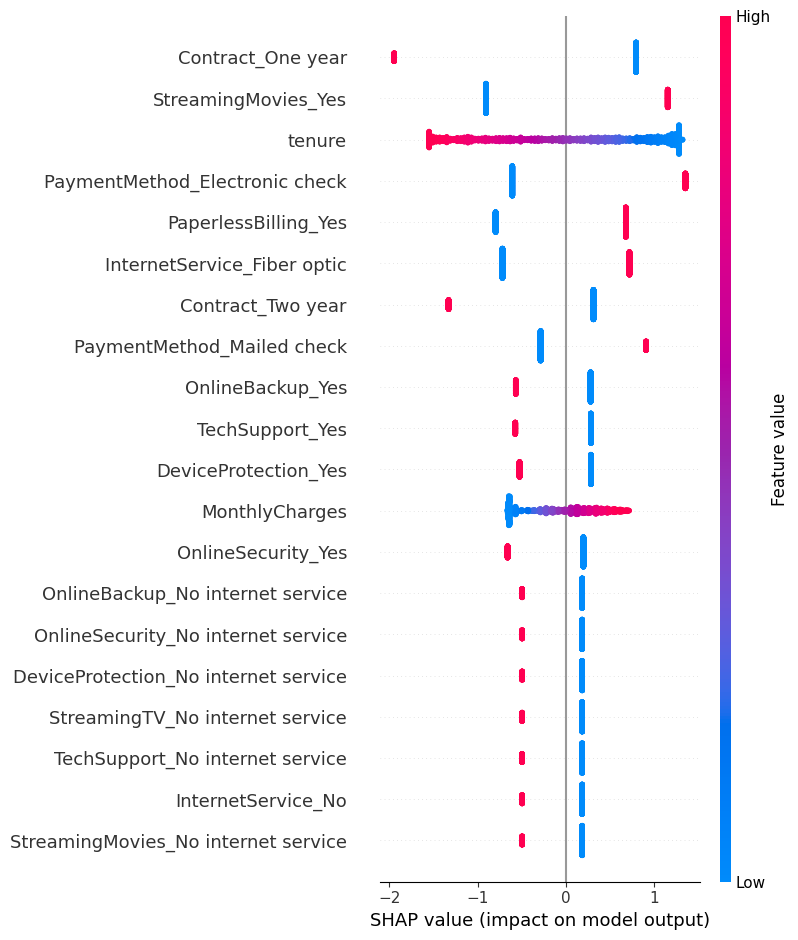

In [26]:
shap.summary_plot(
    shap_values.values,
    X_test,
    feature_names=feature_names
)

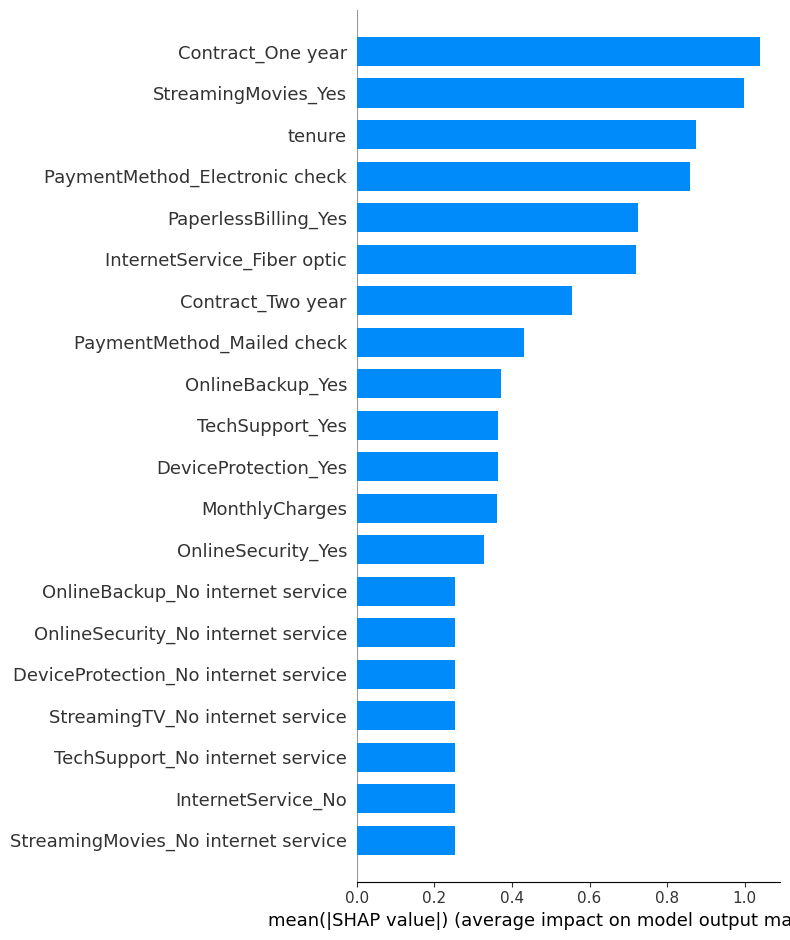

In [27]:
shap.summary_plot(
    shap_values.values,
    X_test,
    feature_names=feature_names,
    plot_type="bar"
)

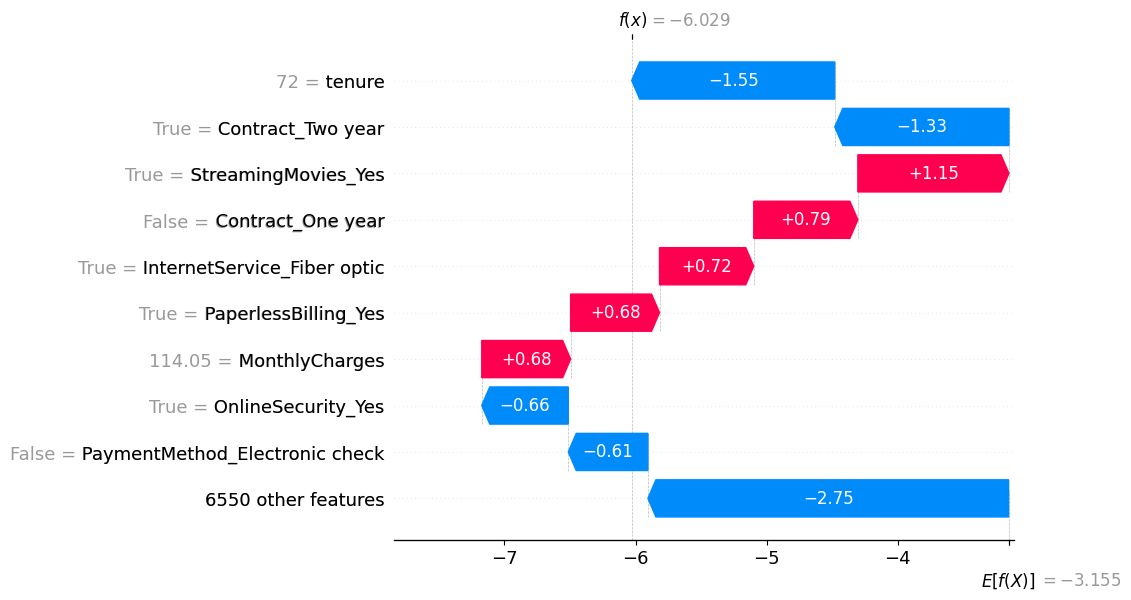

In [28]:
index = 0  # customer index
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values.values[index],
        base_values=shap_values.base_values[index],
        data=X_test.iloc[index],
        feature_names=feature_names
    )
)